<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/24_1_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AutoEncoder

https://www.tensorflow.org/tutorials/generative/autoencoder

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
encoder = models.Sequential()
encoder.add(layers.Flatten(input_shape=[28,28]))
encoder.add(layers.Dense(100, activation='selu'))
encoder.add(layers.Dense(30, activation='selu'))

decoder = models.Sequential()
decoder.add(layers.Flatten(input_shape=[30]))
decoder.add(layers.Dense(100, activation='selu'))
decoder.add(layers.Dense(28*28, activation='sigmoid'))
decoder.add(layers.Reshape([28,28]))

In [4]:
model = models.Sequential([encoder, decoder])
model.compile(loss='binary_crossentropy', 
              optimizer = tf.keras.optimizers.SGD(lr=1.5))
history = model.fit(x_train, x_train, epochs=10, validation_data = (x_test, x_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1872/1875 [============================>.] - ETA: 0s - loss: 0.3354WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001F581BF8708> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the 

In [5]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 30)                81530     
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28)            82284     
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________


In [6]:
print(x_train.max())
print(x_test.max())

1.0
1.0


이미지를 넣어봅시다

In [7]:
def show_recon(model,X_valid, n_images=5):
    recon = model.predict(X_valid[:n_images])
    fig = plt.figure(figsize = (n_images*1.5, 3))
    for i in range(n_images):
        plt.subplot(2,n_images, 1+i)
        plt.imshow(X_valid[i],cmap='gray')
        plt.subplot(2,n_images, 1+n_images+i)
        plt.imshow(recon[i],cmap='gray')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


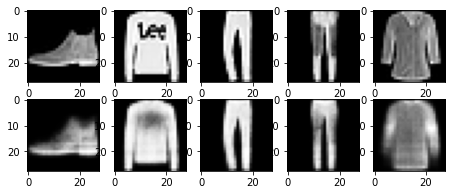

In [8]:
show_recon(model, x_test)

노이즈가 있는 이미지를 만들어보자

In [9]:
noise = np.random.normal(loc=0, scale=0.3, size = x_test.shape )

In [10]:
noise.shape

(10000, 28, 28)

In [11]:
x_test_noise = x_test + noise

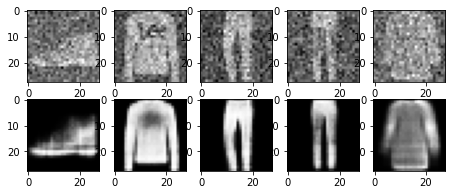

In [12]:
show_recon(model, x_test_noise)

AutoEncoder를 통해 노이즈가 제거된 것을 알수 있다. 